In [16]:
import scapy.all as scapy

import pandas as pd

In [17]:
# pcap_flow = scapy.rdpcap("../sample_pcap_files/R11_R21.pcap")
pcap_flow = scapy.PcapReader("../sample_pcap_files/R11_R21.pcap")
pcap_flow = list(pcap_flow)

In [18]:
p: scapy.Packet = next(p for p in pcap_flow if p.haslayer(scapy.UDP))
f"time {p.time} bytes {len(p.getlayer(scapy.UDP))}"

'time 1677684137.651236 bytes 11'

In [32]:
df = pd.DataFrame(
    {
        "time": [int(p.time) for p in pcap_flow if p.haslayer(scapy.UDP)],
        "size": [len(p.getlayer(scapy.UDP)) for p in pcap_flow if p.haslayer(scapy.UDP)],
    }
)
df["time"] = df["time"] - df.loc[0, "time"]
df.set_index("time", inplace=True)
df

,size
time,
0,11
0,11
0,11
0,11
0,11
...,...
4,11
4,11
4,11


In [33]:
df = df.groupby(df.index).aggregate({"size": "sum"})

<Axes: xlabel='time'>

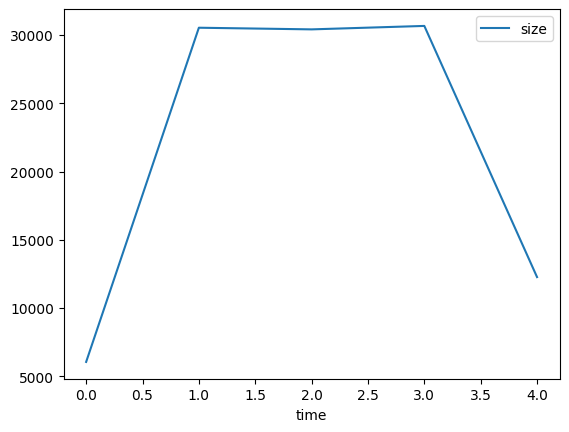

In [34]:
df.plot()